> 🩺 Este notebook forma parte del proyecto **NutriSynthCare**, un entorno de simulación sobre salud pública y recomendaciones nutricionales personalizadas.  
>
> 👥 Desarrollado por:  
> - Daniel Cruz – [dCruzCoding](https://github.com/dCruzCoding)  
> - Aníbal García – [Aniballll](https://github.com/Aniballll)  
>
> 📁 Repositorio completo: [NutriSynthCare](https://github.com/tu-repo-aqui)  
>
> 📜 Licencia: Este proyecto está disponible bajo la licencia MIT. Consulta el archivo `LICENSE` para más información.  
>
> 🙏 Agradecimientos especiales a todas las fuentes de datos y literatura científica que han hecho posible la creación de las bases sintéticas utilizadas en este proyecto.  
>
> 🤝 ¿Te interesa colaborar? ¡Estás invitado!  
> Puedes contribuir mejorando los notebooks, proponiendo nuevas ideas o corrigiendo errores:  
> - Haz un fork del repo  
> - Crea una rama (`git checkout -b mejora/nueva-idea`)  
> - Abre un Pull Request explicando tu propuesta

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Reproducibilidad
np.random.seed(42)

warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Cargamos los csv y lo convertimos en dataframe
df = pd.read_csv("dbfinal_testing_nn.csv")

display(df)

,Año_Registro,Edad,IMC,Diabetes,Colesterol_Total,Trigliceridos,PAS,PAD,Cohorte,HbA1c,Insulina,LDL,HDL,Nivel_Estres,Actividad_Fisica,Riesgo_Cardiovascular,Sexo,Tipo_Diabetes,Tipo_Diabetes_imputada
0,2016,-0.804483,0.148211,0,191.216985,-1.629256,-1.409088,-0.050570,cardio,6.004308,0.000000,108.072757,73.199785,Alto,Moderado,Bajo,Hombre,No diabetes,No diabetes
1,2013,1.050480,-0.142071,0,199.995751,-0.355056,-0.620234,0.053357,cardio,5.896015,99.465366,127.446393,46.040802,Moderado,Sedentario,Bajo,Mujer,No diabetes,No diabetes
2,2017,1.335859,0.443026,1,210.231276,0.209912,-0.653449,0.394831,cardio,8.992536,114.840150,129.872964,50.011740,Moderado,Moderado,Bajo,Mujer,NaN,No diabetes
3,2014,0.194343,1.441094,1,249.149440,0.251009,0.998992,1.181705,cardio,6.935484,178.710940,112.351099,51.766311,Moderado,Sedentario,Bajo,Mujer,NaN,Tipo 2
4,2016,0.337033,-0.076379,0,216.222499,1.357513,-0.678360,-0.377197,cardio,5.088306,103.590906,123.161229,51.987199,Moderado,Sedentario,Moderado,Mujer,No diabetes,No diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15941,2018,-0.634414,-0.096697,1,203.730000,-1.292582,-0.736235,-0.108231,diabetes,5.840000,4.450000,110.970000,64.420000,Moderado,Moderado,NaN,Hombre,Tipo 1,Tipo 1
15942,2012,-0.809270,0.745440,1,220.180000,1.148761,0.084522,-0.072837,diabetes,7.810000,79.930000,116.490000,51.880000,Alto,Sedentario,NaN,Hombre,Tipo 2,Tipo 2
15943,2016,-0.109843,-0.426947,1,215.450000,0.057810,-0.272904,0.009748,diabetes,7.370000,12.610000,114.280000,57.850000,Bajo,Moderado,NaN,Hombre,Tipo 1,Tipo 1
15944,2012,1.376441,-1.170009,1,206.530000,-0.026358,0.501520,-0.096433,diabetes,8.100000,0.390000,111.500000,47.230000,Alto,Sedentario,NaN,Mujer,Tipo 1,Tipo 1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15946 entries, 0 to 15945
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año_Registro            15946 non-null  int64  
 1   Edad                    15946 non-null  float64
 2   IMC                     15946 non-null  float64
 3   Diabetes                15946 non-null  int64  
 4   Colesterol_Total        15946 non-null  float64
 5   Trigliceridos           15946 non-null  float64
 6   PAS                     15946 non-null  float64
 7   PAD                     15946 non-null  float64
 8   Cohorte                 15946 non-null  object 
 9   HbA1c                   15946 non-null  float64
 10  Insulina                15946 non-null  float64
 11  LDL                     15946 non-null  float64
 12  HDL                     15946 non-null  float64
 13  Nivel_Estres            15946 non-null  object 
 14  Actividad_Fisica        15946 non-null

In [4]:
# Eliminar la columna 'Tipo_Diabetes' y renombrar 'Tipo_Diabetes_imputada' a 'TIPD'
df = df.drop(columns=['Tipo_Diabetes'])
df = df.rename(columns={'Tipo_Diabetes_imputada': 'Tipo_Diabetes'})

In [5]:
df['Riesgo_Cardiovascular'].describe()

count     7960
unique       4
top       Bajo
freq      3659
Name: Riesgo_Cardiovascular, dtype: object

In [6]:
# Mostrar información y valores únicos de la columna 'Riesgo_Cardiovascular'
print("Valores únicos de 'Riesgo_Cardiovascular':")
print(df['Riesgo_Cardiovascular'].unique())
print("\nConteo por categoría:")
print(df['Riesgo_Cardiovascular'].value_counts(dropna=False))

Valores únicos de 'Riesgo_Cardiovascular':
['Bajo' 'Moderado' 'Muy Alto' 'Alto' nan]

Conteo por categoría:
Riesgo_Cardiovascular
NaN         7986
Bajo        3659
Alto        2040
Moderado    1413
Muy Alto     848
Name: count, dtype: int64


In [7]:
df.columns

Index(['Año_Registro', 'Edad', 'IMC', 'Diabetes', 'Colesterol_Total',
       'Trigliceridos', 'PAS', 'PAD', 'Cohorte', 'HbA1c', 'Insulina', 'LDL',
       'HDL', 'Nivel_Estres', 'Actividad_Fisica', 'Riesgo_Cardiovascular',
       'Sexo', 'Tipo_Diabetes'],
      dtype='object')

In [8]:
# Variables categóricas y sus valores únicos
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns
print("Variables categóricas y sus valores únicos:")
for col in categorical_cols:
    print(f"> {col}: {df[col].unique()}")

# Variables numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("\nVariables numéricas:")
print(list(numeric_cols))

Variables categóricas y sus valores únicos:
> Cohorte: ['cardio' 'diabetes']
> Nivel_Estres: ['Alto' 'Moderado' 'Bajo']
> Actividad_Fisica: ['Moderado' 'Sedentario' 'Activo']
> Riesgo_Cardiovascular: ['Bajo' 'Moderado' 'Muy Alto' 'Alto' nan]
> Sexo: ['Hombre' 'Mujer']
> Tipo_Diabetes: ['No diabetes' 'Tipo 2' 'Diabetes latente' 'Gestacional' 'Tipo 1']

Variables numéricas:
['Año_Registro', 'Edad', 'IMC', 'Diabetes', 'Colesterol_Total', 'Trigliceridos', 'PAS', 'PAD', 'HbA1c', 'Insulina', 'LDL', 'HDL']


In [9]:
features = [
    'Edad', 'Sexo', 'HbA1c', 'Colesterol_Total', 'PAS', 'PAD',
    'Nivel_Estres', 'Actividad_Fisica', 'IMC', 'Diabetes',
    'Trigliceridos', 'LDL', 'HDL'
]

categorical_cols = ['Sexo', 'Nivel_Estres', 'Actividad_Fisica']


--- 1. Iniciando Preprocesamiento de Datos ---


[I 2025-06-15 22:28:34,975] A new study created in memory with name: no-name-7d56306e-223c-43ea-b026-56e8f20d64cf



--- 2. Iniciando Búsqueda de Hiperparámetros con Optuna ---


[I 2025-06-15 22:28:49,187] Trial 0 finished with value: 0.782035175879397 and parameters: {'lr': 0.0035049626050927376, 'weight_decay': 1.5578493779719982e-05, 'dropout1': 0.42452458825030626, 'dropout2': 0.29101528559463136}. Best is trial 0 with value: 0.782035175879397.
[I 2025-06-15 22:28:59,851] Trial 1 finished with value: 0.7713567839195979 and parameters: {'lr': 0.0018657759252408224, 'weight_decay': 0.00016079699640273343, 'dropout1': 0.2827404346015435, 'dropout2': 0.2548161900729271}. Best is trial 0 with value: 0.782035175879397.
[I 2025-06-15 22:29:09,959] Trial 2 finished with value: 0.7738693467336684 and parameters: {'lr': 0.0001622477558780504, 'weight_decay': 6.080922778840097e-05, 'dropout1': 0.3533479282580377, 'dropout2': 0.27949814658653227}. Best is trial 0 with value: 0.782035175879397.
[I 2025-06-15 22:29:20,961] Trial 3 finished with value: 0.7763819095477387 and parameters: {'lr': 0.005738093736912888, 'weight_decay': 0.0003347667572608489, 'dropout1': 0.388

Búsqueda finalizada.
Mejor Accuracy encontrada: 0.7833
Mejores hiperparámetros: {'lr': 0.005076779103109431, 'weight_decay': 0.00018680993928176073, 'dropout1': 0.25419127186036855, 'dropout2': 0.13377777122542434}

--- 3. Entrenando el Modelo Campeón con los Mejores Hiperparámetros ---
Epoch 1/200, Val Loss: 0.4728
Epoch 21/200, Val Loss: 0.4650
🛑 Early stopping en la época 32

--- 4. Evaluación Final del Modelo Campeón ---

Classification Report Final:
              precision    recall  f1-score   support

  Sin Riesgo       0.73      0.82      0.77       732
  Con Riesgo       0.83      0.74      0.78       860

    accuracy                           0.78      1592
   macro avg       0.78      0.78      0.78      1592
weighted avg       0.78      0.78      0.78      1592


Matriz de Confusión Final:


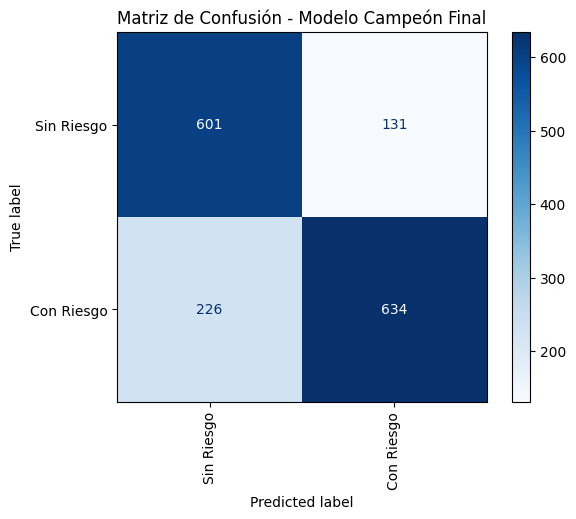

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from imblearn.over_sampling import SMOTE
from torch.optim.lr_scheduler import ReduceLROnPlateau
import optuna

# Silenciar warnings de Optuna que pueden ser muy verbosos
warnings.filterwarnings("ignore", category=optuna.exceptions.ExperimentalWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# --- 1. Preprocesamiento (idéntico, función de conveniencia) ---
def preprocess_data(df):
    print("--- 1. Iniciando Preprocesamiento de Datos ---")
    categorical_cols = ['Sexo', 'Tipo_Diabetes', 'Nivel_Estres', 'Actividad_Fisica']
    target_col = 'Riesgo_Cardiovascular'
    numerical_cols = ['Edad', 'HbA1c', 'Colesterol_Total', 'PAS', 'PAD', 'IMC', 'Diabetes', 'Trigliceridos', 'LDL', 'HDL', 'Insulina']
    
    df_complete = df.dropna(subset=[target_col]).copy()
    df_complete[target_col] = df_complete[target_col].replace('Muy Alto', 'Alto')
    
    encoders = {}
    for col in categorical_cols:
        le = LabelEncoder(); df_complete[col] = le.fit_transform(df_complete[col].astype(str)); encoders[col] = le
    
    target_encoder = LabelEncoder(); df_complete[target_col] = target_encoder.fit_transform(df_complete[target_col].astype(str)); encoders[target_col] = target_encoder
    
    all_feature_cols = categorical_cols + numerical_cols 
    X = df_complete[all_feature_cols]
    y = df_complete[target_col]
    
    scaler = StandardScaler(); X.loc[:, numerical_cols] = scaler.fit_transform(X[numerical_cols].astype(float))
    
    alto_label = target_encoder.transform(['Alto'])[0]; moderado_label = target_encoder.transform(['Moderado'])[0]; bajo_label = target_encoder.transform(['Bajo'])[0]
    y_binary = y.copy(); y_binary[y.isin([alto_label, moderado_label])] = 1; y_binary[y.isin([bajo_label])] = 0
    
    X_train, X_test, y_train_binary, y_test_binary = train_test_split(X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
    X_train_res, y_train_res_binary = SMOTE(random_state=42).fit_resample(X_train, y_train_binary)
    
    return X_train_res, X_test, y_train_res_binary, y_test_binary

# --- 2. Modelo (Definición) ---
class RiskBinaryClassifier(nn.Module):
    def __init__(self, input_dim, dropout_rate1=0.4, dropout_rate2=0.3):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64), nn.BatchNorm1d(64), nn.ReLU(), nn.Dropout(dropout_rate1),
            nn.Linear(64, 32), nn.BatchNorm1d(32), nn.ReLU(), nn.Dropout(dropout_rate2),
            nn.Linear(32, 2)
        )
    def forward(self, x): return self.net(x)

# --- 3. Búsqueda de Hiperparámetros con Optuna ---
def find_best_hyperparameters(X_train_df, y_train_series, X_test_df, y_test_series):
    print("\n--- 2. Iniciando Búsqueda de Hiperparámetros con Optuna ---")
    
    X_train_tensor = torch.tensor(X_train_df.values, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train_series.values, dtype=torch.long)
    X_test_tensor = torch.tensor(X_test_df.values, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test_series.values, dtype=torch.long)

    def objective(trial):
        lr = trial.suggest_float('lr', 1e-4, 1e-2, log=True)
        weight_decay = trial.suggest_float('weight_decay', 1e-6, 1e-3, log=True)
        dropout1 = trial.suggest_float('dropout1', 0.2, 0.5)
        dropout2 = trial.suggest_float('dropout2', 0.1, 0.4)
        
        model = RiskBinaryClassifier(X_train_tensor.shape[1], 2, dropout1, dropout2)
        optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
        criterion = nn.CrossEntropyLoss()
        train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=64, shuffle=True)

        # Bucle de entrenamiento rápido
        for epoch in range(30): # Menos épocas para una búsqueda rápida
            model.train()
            for X_batch, y_batch in train_loader:
                optimizer.zero_grad(); outputs = model(X_batch); loss = criterion(outputs, y_batch); loss.backward(); optimizer.step()

        # Evaluar
        model.eval()
        with torch.no_grad():
            y_pred_logits = model(X_test_tensor); y_pred = torch.argmax(y_pred_logits, dim=1)
        return accuracy_score(y_test_tensor, y_pred)

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=50, timeout=600) # 50 intentos o 10 minutos
    
    print("Búsqueda finalizada.")
    print(f"Mejor Accuracy encontrada: {study.best_value:.4f}")
    print("Mejores hiperparámetros:", study.best_params)
    return study.best_params

# --- 4. Entrenamiento del Modelo Final ---
def train_final_model(best_params, X_train_df, y_train_series, X_test_df, y_test_series):
    print("\n--- 3. Entrenando el Modelo Campeón con los Mejores Hiperparámetros ---")
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    X_train_tensor = torch.tensor(X_train_df.values, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train_series.values, dtype=torch.long).to(device)
    X_test_tensor = torch.tensor(X_test_df.values, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test_series.values, dtype=torch.long) # Para sklearn
    
    train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=64, shuffle=True)
    
    # Crear modelo con los mejores parámetros encontrados
    model = RiskBinaryClassifier(
        input_dim=X_train_tensor.shape[1], 
        output_dim=2,
        dropout_rate1=best_params['dropout1'],
        dropout_rate2=best_params['dropout2']
    ).to(device)
    
    optimizer = optim.Adam(
        model.parameters(), 
        lr=best_params['lr'], 
        weight_decay=best_params['weight_decay']
    )
    criterion = nn.CrossEntropyLoss()
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=False)
    
    # Bucle de entrenamiento completo con Early Stopping
    epochs = 200
    best_val_loss = float('inf')
    patience = 25
    patience_counter = 0
    best_model_state = None

    for epoch in range(epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad(); outputs = model(X_batch); loss = criterion(outputs, y_batch); loss.backward(); optimizer.step()
        
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_test_tensor)
            val_loss = criterion(val_outputs, y_test_tensor.to(device))
        
        scheduler.step(val_loss)

        if epoch % 20 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Val Loss: {val_loss.item():.4f}")

        if val_loss.item() < best_val_loss:
            best_val_loss = val_loss.item(); best_model_state = model.state_dict(); patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"🛑 Early stopping en la época {epoch+1}")
                break
    
    # Cargar el mejor modelo y evaluar
    model.load_state_dict(best_model_state)
    return model


# --- Flujo de Ejecución Principal ---
if __name__ == '__main__':
    
    # 1. Preparar los datos
    X_train, X_test, y_train, y_test = preprocess_data(df)
    
    # 2. Encontrar los mejores hiperparámetros
    best_hyperparams = find_best_hyperparameters(X_train, y_train, X_test, y_test)
    
    # 3. Entrenar el modelo final con esos parámetros
    final_model = train_final_model(best_hyperparams, X_train, y_train, X_test, y_test)
    
    # 4. Evaluar el modelo campeón final
    print("\n--- 4. Evaluación Final del Modelo Campeón ---")
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)
    y_test_numpy = y_test.values

    final_model.eval()
    with torch.no_grad():
        y_pred_logits = final_model(X_test_tensor)
        y_pred = torch.argmax(y_pred_logits, dim=1).cpu().numpy()

    binary_class_labels = ['Sin Riesgo', 'Con Riesgo']
    print("\nClassification Report Final:")
    print(classification_report(y_test_numpy, y_pred, target_names=binary_class_labels))

    print("\nMatriz de Confusión Final:")
    cm = confusion_matrix(y_test_numpy, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=binary_class_labels)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
    plt.title("Matriz de Confusión - Modelo Campeón Final")
    plt.show()